# Set-up

In [149]:
import os
import sys
import numpy as np
import pandas as pd
import mudata as mu
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

%matplotlib inline

In [86]:
# Path to mudata
path_mdata = "/cellar/users/aklie/data/datasets/paul15/analysis/celloracle/2024_05_21/celloracle.h5mu"

# If needed
path_r2g = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/analysis/timecourse/A2_control/celloracle/2024_05_02/r2g.csv"
path_tf2r = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/analysis/timecourse/A2_control/celloracle/2024_05_02/tf2r.csv"
path_grn = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/analysis/timecourse/A2_control/celloracle/2024_05_02/grn.csv"

# Params
layer = "imputed_count"

# Load data

In [87]:
# MuData
mdata = mu.read_h5mu(path_mdata)
mdata

/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 2671 × 1999
  obs:	'louvain_annot'
  var:	'n_counts', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
  uns:	'grn', 'tutorial_grn'
  1 modality
    rna:	2671 x 1999
      obs:	'paul15_clusters', 'n_counts_all', 'n_counts', 'louvain', 'cell_type', 'louvain_annot', 'Lineage_MEP', 'Lineage_GMP', 'Pseudotime_Lineage_MEP', 'Pseudotime_Lineage_GMP', 'Pseudotime'
      var:	'n_counts', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
      uns:	'cell_type_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'log1p', 'louvain', 'louvain_annot_colors', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'paul15_clusters_colors', 'pca'
      obsm:	'X_diffmap', 'X_draw_graph_fa', 'X_pca'
      varm:	'PCs'
      layers:	'imputed_count', 'normalized_count', 'raw_count', 'scaled_imputed_counts'
      obsp:	'connectivities', 'distances'

# GRN selection

In [133]:
# Parameters
pval = 0.001
score = 0
ntop = 2000
layer = None
cluster_key = "cluster"
cluster = "MEP_0"
grn_key = "tutorial_grn"
min_regulators = 0
min_targets = 0

In [134]:
# Read in grns
grn = mdata.uns[grn_key]
print(f"Initial GRN has {len(grn)} edges")

Initial GRN has 1716652 edges


In [135]:
# Choose a cluster of interest (based on cluster column values in standardized outputs)
grn = grn[grn[cluster_key] == cluster]
print(f"GRN for {cluster} has {len(grn)} edges")

GRN for MEP_0 has 73700 edges


In [136]:
# If pval and score are not None, filter based on these thresholds
if pval is not None:
    grn = grn[grn["pval"] < pval]
if score is not None:
    grn = grn[grn["score"] > score]
print(f"GRN after filtering on edge strength has {len(grn)} edges")

GRN after filtering on edge strength has 19717 edges


In [137]:
# Keep only the top ntop regulators if ntop is not None
if ntop is not None:
    if score is not None and pval is None:
        grn = grn.sort_values("score", ascending=False)
    else:
        grn = grn.sort_values("pval", ascending=True)
    grn = grn.head(ntop)
print(f"GRN after filtering on top regulators has {len(grn)} edges")

GRN after filtering on top regulators has 2000 edges


In [138]:
# Filter out any tfs that regulate fewer than min_targets genes
tfs = grn["tf"].value_counts()
tfs = tfs[tfs > min_targets].index
grn = grn[grn["tf"].isin(tfs)]
print(f"GRN after filtering on minimum number of targets has {len(grn)} edges")

GRN after filtering on minimum number of targets has 2000 edges


In [139]:
# Filter out any genes that are regulated by fewer than min_regulators tfs
genes = grn["gene"].value_counts()
genes = genes[genes >= min_regulators].index
grn = grn[grn["gene"].isin(genes)]
print(f"GRN after filtering on minimum number of regulators has {len(grn)} edges")

GRN after filtering on minimum number of regulators has 2000 edges


In [144]:
import celloracle as co

/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dn

In [181]:
links = co.data.load_tutorial_links_object()
links

In [182]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)

In [183]:
links.

AttributeError: 'Links' object has no attribute 'filtered_links_dict'

In [180]:
links.links_dict

,source,target,coef_mean,coef_abs,p,-logp
0,Irf7,0610007L01Rik,0.002213,0.002213,0.012779,1.893489
1,Fli1,0610007L01Rik,0.003831,0.003831,0.025903,1.586646
2,Foxp1,0610007L01Rik,0.009860,0.009860,0.000004,5.436141
3,Chd2,0610007L01Rik,-0.008228,0.008228,0.000049,4.306484
4,Stat1,0610007L01Rik,-0.005902,0.005902,0.000163,3.787611
...,...,...,...,...,...,...
74932,Stat3,Zyx,0.020837,0.020837,0.000013,4.890446
74933,Nfic,Zyx,0.013475,0.013475,0.000167,3.776518
74934,Stat5a,Zyx,-0.012675,0.012675,0.000226,3.646608
74935,Hnf4a,Zyx,0.012644,0.012644,0.000004,5.374870


In [ ]:
links.plot_degree_distributions(plot_model=True)

In [153]:
grn = links.links_dict["MEP_0"]

In [172]:
out = _compute_scale_free_topology_fit(
    grn,
    source="source",
    target="target",
)

In [174]:
out

{'degree_distribution': 38      0.026501
 41      0.025960
 43      0.025419
 30      0.023256
 53      0.022174
           ...   
 1720    0.000541
 862     0.000541
 841     0.000541
 1616    0.000541
 1       0.000541
 Name: degree, Length: 164, dtype: float64,
 'model': LinearRegression(),
 'r2': 0.5278738123476037}

(<Figure size 800x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'degree distribution'}, xlabel='k', ylabel='P(k)'>,
        <AxesSubplot: title={'center': 'degree distribution (log scale)\nslope: -0.6319, r2: 0.5279'}, xlabel='log k', ylabel='log P(k)'>],
       dtype=object))

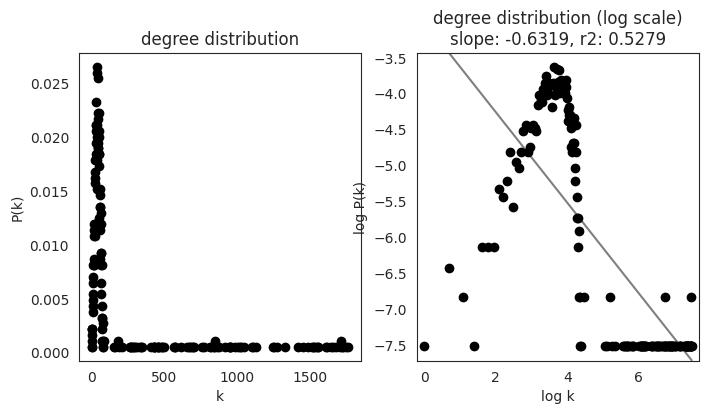

In [173]:
_plot_scale_free_topology_fit(
    out["degree_distribution"],
    out["model"]
)

Signature: links.plot_degree_distributions(plot_model=False, save=None)
Docstring:
Plot the network degree distributions (the number of edge per gene).
The network degree will be visualized in both linear scale and log scale.

Args:
    links (Links): See network_analysis.Links class for detail.
    plot_model (bool): Whether to plot linear approximation line.
    save (str): Folder path to save plots. If the folder does not exist in the path, the function creates the folder.
       Plots will not be saved if [save=None]. Default is None.
File:      ~/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/celloracle/network_analysis/links_object.py
Type:      method

# Scale-free topology

In [163]:
nx.from_pandas_edgelist?

Signature:     
nx.from_pandas_edgelist(
    df,
    source='source',
    target='target',
    edge_attr=None,
    create_using=None,
    edge_key=None,
    *,
    backend=None,
    **backend_kwargs,
)
Call signature: nx.from_pandas_edgelist(*args, backend=None, **kwargs)
Type:           _dispatch
String form:    <networkx.utils.backends._dispatch object at 0x155455489c60>
File:           ~/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/networkx/convert_matrix.py
Docstring:     
Returns a graph from Pandas DataFrame containing an edge list.

The Pandas DataFrame should contain at least two columns of node names and
zero or more columns of edge attributes. Each row will be processed as one
edge instance.

Note: This function iterates over DataFrame.values, which is not
guaranteed to retain the data type across columns in the row. This is only
a problem if your row is entirely numeric and a mix of ints and floats. In
that case, all values will be returned as floats. See

In [171]:
from igraph import Graph
import networkx as nx
from sklearn.linear_model import LinearRegression
import mudata


def _compute_scale_free_topology_fit(
    grn: pd.DataFrame,
    source: str = "tf",
    target: str = "gene",
):
    # Make networkx graph
    G = nx.DiGraph()
    G_ = nx.from_pandas_edgelist(grn, source=source, target=target, edge_attr=True)
    G.add_edges_from(G_.edges())

    # Get degree distribution
    df = pd.DataFrame(np.array(G.degree))
    df.columns = ["ind", "degree"]
    df = df.set_index("ind")
    dist = df.degree.value_counts()/df.degree.value_counts().sum()
    dist.index = dist.index.astype(int)

    # Fit power law
    x = np.log(dist.index.values).reshape([-1,1])
    y = np.log(dist.values).reshape([-1,1])
    model = LinearRegression()
    model.fit(x,y)

    # Store degree distribution, model, and R2 in uns["scale_free_topology"]
    output = {
        "degree_distribution": dist,
        "model": model,
        "r2": model.score(x,y)
    }

    return output


def _compute_scale_free_topology_fit_deprecated(
    grn: pd.DataFrame,
    source: str = "tf",
    target: str = "gene",
    score: str = "score",
):

    # Build iGraph
    g = Graph.DataFrame(grn[[source, target]], directed=True, use_vids=False)
    g.es[score] = grn[score].values.copy()

    # Extract degree distribution
    degree_df = pd.DataFrame(g.degree(mode="all"), columns=["degree"])
    dist = degree_df.degree.value_counts()/degree_df.degree.value_counts().sum()
    
    # Fit power law
    x = np.log(dist.index.values).reshape([-1,1])
    y = np.log(dist.values).reshape([-1,1])
    model = LinearRegression()
    model.fit(x,y)

    # Store degree distribution, model, and R2 in uns["scale_free_topology"]
    output = {
        "degree_distribution": dist,
        "model": model,
        "r2": model.score(x,y)
    }

    return output

In [166]:
def _plot_scale_free_topology_fit(
    degree_dist,
    model,
    ax=None
):
    # Create figure
    fig, ax = plt.subplots(1, 2, figsize=(8,4))

    # Plot degree (k) vs P(k)
    ax[0].scatter(degree_dist.index.values, degree_dist.values, c="black")
    ax[0].set_title("degree distribution")
    ax[0].set_xlabel("k")
    ax[0].set_ylabel("P(k)")

    # Get log-log scale
    x = np.log(degree_dist.index.values).reshape([-1,1])
    y = np.log(degree_dist.values).reshape([-1,1])

    # For each x value, calculate the predicted y value
    x_ = np.linspace(x.min(), x.max(), 100).reshape([-1,1])
    y_ = model.predict(x_)

    # Plot log-log scale
    ax[1].set_title(f"degree distribution (log scale)\nslope: {model.coef_[0][0] :.4g}, r2: {model.score(x,y) :.4g}")
    ax[1].plot(x_.flatten(), y_.flatten(), c="black", alpha=0.5)
    ax[1].scatter(x.flatten(), y.flatten(), c="black")
    ax[1].set_ylim([y.min()-0.2, y.max()+0.2])
    ax[1].set_xlim([-0.2, x.max()+0.2])
    ax[1].set_xlabel("log k")
    ax[1].set_ylabel("log P(k)")

    # Return figure
    return fig, ax

In [156]:
out = _compute_scale_free_topology_fit(
    grn
)

KeyError: "None of [Index(['tf', 'gene'], dtype='object')] are in the [columns]"

In [170]:
out

In [169]:
_plot_scale_free_topology_fit(
    out["degree_distribution"],
    out["model"]
)

TypeError: 'NoneType' object is not subscriptable

# Gene expression prediction

In [108]:
# Regression models to choose from
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from joblib import Parallel, delayed
from tqdm.auto import tqdm

In [109]:
def _select_data(
    grn,        
    adata,
    target,
    source_key="tf",
    target_key="gene",
    layer=None,
    return_regulators=False
):
    sub_grn = grn[grn[target_key] == target]
    regulators = sub_grn[source_key].values
    regulator_idx = np.where(adata.var.index.isin(regulators))[0]
    target_idx = np.where(adata.var.index == target)[0]
    if layer is not None:
        if layer not in adata.layers.keys():
            raise ValueError(f"Layer {layer} not found in adata.")
        X = adata[:, regulator_idx].layers[layer].copy()
        y = adata[:, target_idx].layers[layer].copy()
    else:
        X = adata[:, regulator_idx].X.copy()
        y = adata[:, target_idx].X.copy()
    if hasattr(X, "toarray"):
        X = X.toarray()
    if hasattr(y, "toarray"):
        y = y.toarray()
    if len(y.shape) > 1:
        y = y.flatten()
    if return_regulators:
        return X, y, regulators
    else:
        return X, y


def _fit_model(
    grn, 
    adata,
    target,
    model=LinearRegression(),
    min_regulators=1,
    source_key="tf",
    target_key="gene",
    layer=None,
    verbose=True
):
    X, y, regulators = _select_data(grn, adata, target, source_key, target_key, layer, return_regulators=True)
    n_cells, n_regulators = X.shape
    if n_regulators < min_regulators:
        if verbose:
            print(f"Skipping {target} due to insufficient number of regulators: {n_regulators}")
        return None
    model.fit(X, y)
    r2 = model.score(X, y)
    mse = np.mean((model.predict(X) - y) ** 2)
    return {"target": target, "r2": r2, "mse": mse, "n_cells": n_cells, "regulators": regulators}


def _compute_gene_expression_prediction(
    grn,
    adata,
    model=LinearRegression(),
    min_regulators=1,
    source_key="tf",
    target_key="gene",
    layer=None,
    n_jobs=1,
    verbose=True,
):
    """
    Computes the proportion of variance in the data explained by each program.

    ARGS
        mdata : MuData
            mudata object containing anndata of program scores and cell-level metadata.
        grn_key: str
            index for the anndata object (mdata[grn_key]) in the mudata object.
        data_key: str
            index of the genomic data anndata object (mdata[data_key]) in the mudata object.
        model: sklearn.linear_model
            model to fit the gene expression prediction.
        min_regulators: int
            minimum number of regulators required to fit the model.
        n_jobs: int (default: 1)
            number of threads to run processes on.
        verbose: Bool (default: True)
            print progress.
        inplace: Bool (default: True)
            update the mudata object inplace or return a copy
       
    RETURNS 
        if not inplace:
            mdata[grn_key].var['explained_variance_ratio_{}'.format(layer)]
            
    """
    targets = grn[target_key].unique()
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(_fit_model)(
            grn, adata, target, model, min_regulators, source_key, target_key, layer, verbose
        ) for target in tqdm(targets, disable=not verbose,
                             desc="Gene expression prediction", unit="targets")
    )
    
    results = [r for r in results if r is not None]
    results = pd.DataFrame(results)
    results["n_regulators"] = results["regulators"].apply(len)
    
    return results

In [73]:
# Get the RNA anndata
adata = mdata.mod["rna"].copy()
adata

AnnData object with n_obs × n_vars = 2671 × 1999
    obs: 'paul15_clusters', 'n_counts_all', 'n_counts', 'louvain', 'cell_type', 'louvain_annot', 'Lineage_MEP', 'Lineage_GMP', 'Pseudotime_Lineage_MEP', 'Pseudotime_Lineage_GMP', 'Pseudotime'
    var: 'n_counts', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
    uns: 'cell_type_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'log1p', 'louvain', 'louvain_annot_colors', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'paul15_clusters_colors', 'pca'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count', 'raw_count', 'scaled_imputed_counts'
    obsp: 'connectivities', 'distances'

In [74]:
if layer in adata.layers:
    print(f"Using data in layer {layer} for regression.")
    adata.X = adata.layers[layer].copy()

In [75]:
gene = "Malat1"

In [76]:
# Test it
X, y = _select_data(grn, adata, gene)
X.shape, y.shape

((2671, 6), (2671,))

In [77]:
# How many regulators are there?
grn[grn["gene"] == gene]

,tf,gene,score,pval,cluster
3472,Irf1,Malat1,0.879550,0.000064,global
2508,Gata2,Malat1,1.490482,0.000864,global
5580,Nr3c1,Malat1,0.746405,0.005500,global
5148,Nfe2,Malat1,1.228244,0.016693,global
1611,Fli1,Malat1,0.839920,0.024846,global
6181,Sox4,Malat1,0.467780,0.166318,global


In [78]:
_fit_model(
    grn=grn,
    adata=adata,
    target=gene,
    model=XGBRegressor(),
    min_regulators=5,
    verbose=True
)

{'target': 'Malat1',
 'r2': 0.5210618220390228,
 'mse': 0.28148627,
 'n_cells': 2671,
 'regulators': array(['Irf1', 'Gata2', 'Nr3c1', 'Nfe2', 'Fli1', 'Sox4'], dtype=object)}

In [81]:
fit_df = _compute_gene_expression_prediction(
    grn,
    adata,
    model=Ridge(alpha=10),
    min_regulators=3,
    n_jobs=3,
    verbose=True
)

Gene expression prediction:   0%|          | 0/1628 [00:00<?, ?targets/s]

Skipping Psmb9 due to insufficient number of regulators: 1
Skipping Tmem50a due to insufficient number of regulators: 1
Skipping Prg2 due to insufficient number of regulators: 1
Skipping Prss34 due to insufficient number of regulators: 2
Skipping Slc7a4 due to insufficient number of regulators: 2
Skipping Prtn3 due to insufficient number of regulators: 1
Skipping Serinc5 due to insufficient number of regulators: 2
Skipping Hagh due to insufficient number of regulators: 1
Skipping Arid4b due to insufficient number of regulators: 2
Skipping Drosha due to insufficient number of regulators: 1
Skipping 9030617O03Rik due to insufficient number of regulators: 2
Skipping Snrnp40 due to insufficient number of regulators: 2
Skipping Klrk1 due to insufficient number of regulators: 2
Skipping Siva1 due to insufficient number of regulators: 2
Skipping Guk1 due to insufficient number of regulators: 2
Skipping Pglyrp2 due to insufficient number of regulators: 2
Skipping Cars due to insufficient numbe

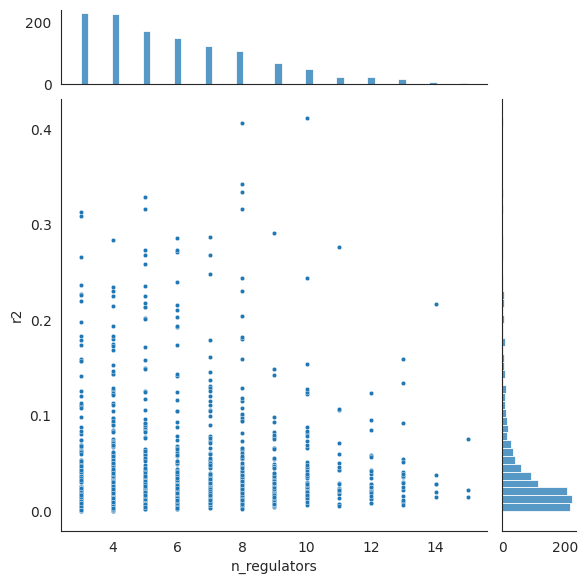

Skipping Dlst due to insufficient number of regulators: 1
Skipping Mdh2 due to insufficient number of regulators: 1
Skipping Arhgdig due to insufficient number of regulators: 1
Skipping Ttc27 due to insufficient number of regulators: 1
Skipping Psmd2 due to insufficient number of regulators: 1
Skipping Uba1 due to insufficient number of regulators: 1
Skipping I830077J02Rik due to insufficient number of regulators: 1
Skipping Tnfaip8l2 due to insufficient number of regulators: 1
Skipping Klhdc8b due to insufficient number of regulators: 1
Skipping Ifih1 due to insufficient number of regulators: 2
Skipping 2810474O19Rik due to insufficient number of regulators: 1
Skipping Rec8 due to insufficient number of regulators: 1
Skipping Ccdc102a due to insufficient number of regulators: 2
Skipping Neil3 due to insufficient number of regulators: 1
Skipping Ly6d due to insufficient number of regulators: 1
Skipping Lmcd1 due to insufficient number of regulators: 1
Skipping Ftsj1 due to insufficient

In [82]:
# Plot a joint plot of R^2 vs number of regulators colored by mse
sns.jointplot(
    data=fit_df,
    x="n_regulators",
    y="r2",
    kind="scatter",
    marginal_kws=dict(bins=50, fill=True),
    marginal_ticks=True,
    s=10
)

In [71]:
# Look at top 10 r2
fit_df.sort_values("r2", ascending=False).head(10)

,target,r2,mse,n_cells,regulators,n_regulators
87,H2afy,0.410913,0.556442,2671,"[Irf8, Cebpa, Gata1, Gata2, Spi1, Etv6, Nr3c1,...",10
311,Coro1a,0.406301,0.449895,2671,"[Irf8, Spi1, Cebpa, Irf1, Gata1, Sox4, Etv6, G...",8
140,Emb,0.342672,0.229549,2671,"[Irf8, Spi1, Klf4, Cebpa, Gata1, Stat5a, Irf1,...",8
155,Laptm5,0.333934,0.443527,2671,"[Spi1, Irf1, Gata1, Irf8, Runx1, Nfia, Cebpa, ...",8
532,Aqp1,0.329112,0.315534,2671,"[Spi1, Gfi1b, Cebpa, Irf1, Gata1]",5
47,Zfpm1,0.316596,0.355158,2671,"[Cebpa, Spi1, Gata1, Gfi1b, Egr1, Irf1, Irf2, ...",8
24,Tyrobp,0.315660,0.258587,2671,"[Irf8, Klf4, Fli1, Spi1, Cebpa]",5
353,Fam132a,0.312603,0.545836,2671,"[Gata1, Gfi1b, Fli1]",3
76,Lgals1,0.308400,0.558927,2671,"[Irf8, Gata1, Spi1]",3
154,Ramp1,0.291196,0.358620,2671,"[Spi1, Irf8, Gata1, Irf1, Cebpa, Stat5a, Gfi1b...",9


# DONE!

---